<a href="https://colab.research.google.com/github/Ashish-17CSE/Hate_Speech_Detection/blob/main/Codemixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
def read_conll(in_file, lowercase=False, max_example=None):
    data = []
    with open(in_file) as f:
        words, lang = [], []
        id = "";
        label = "";
        for line in f.readlines():
            sp = line.strip().split('\t')
            if sp[0]=="meta" and len(sp)>2:
              vc = {"id":id,"label":label,"words":words,"lang":lang}
              data.append(vc);
              words,lang = [],[]
              id = sp[1]
              label = sp[2]
            elif len(sp)>1:
              words.append(sp[0])
              lang.append(sp[1])
        vc = {"id":id,"label":label,"words":words,"lang":lang}
        data.append(vc);
    return data 


In [ ]:
#convert to sentances

def read_conll(in_file, lowercase=False, max_example=None):
    data = []
    with open(in_file) as f:
        words = " "
        id = "";
        label = "";
        for line in f.readlines():
            sp = line.strip().split('\t')
            if sp[0]=="meta" and len(sp)>2:
              vc = {"id":id,"label":label,"tweet":words}
              data.append(vc);
              words = " "
              id = sp[1]
              label = sp[2]
            elif len(sp)>1:
              if sp[1]!="O":
                words = words + sp[0] +" " #+"("+sp[1]+") "
        vc = {"id":id,"label":label,"tweet":words}
        data.append(vc);
    return data 



In [ ]:
#Merge test labels and tweets
'''
 Me Rajendra hu
 Hin Eng     Hin

 Me Rajendra Hu(Hin)
'''

def read_conll_test(in_file, lowercase=False, max_example=None):
    data = []
    with open(in_file) as f:
        words = " "
        id = "";
        label = "";
        for line in f.readlines():
            print(line)
            sp = line.strip().split('\t')
            if sp[0]=="meta":
              vc = {"id":id,"tweet":words}
              data.append(vc);
              words = " "
              id = sp[1]
            elif len(sp)>1:
              if sp[1]!="O":
                words = words + sp[0] +" " # +"("+sp[1]+") "
        vc = {"id":id,"tweet":words}
        data.append(vc);
    return data 

dataset = "/content/test.txt"
test = read_conll_test(dataset)[1:]
test = pd.DataFrame(test)
test.head()


Streaming output truncated to the last 5000 lines.
RSS	Eng

group	Eng

it's	Eng

my	Eng

humble	Eng

sugess	Eng

â€¦	O

https	Eng

//	O

t	Eng

.	O

co	Eng

/	O

xUqe0L5e2y	Eng



meta	11235

RT	Eng

@	O

Kalpesh63520042	Eng

@	O

DrHarkar	Eng

@	O

LaxmiBi87208189	Eng

Hindu	Eng

Sanskruti	Hin

ki	Hin

raksha	Hin

karne	Hin

valo	Hin

ko	Hin

hi	Hin

jhute	Hin

aropo	Eng

me	Hin

fasaya	Hin

jata	Hin

hai	Hin

#	O

WeSupportPunalek	Hin

â€¦	O



meta	13204

Nothing	Eng

funny	Eng

Amardeep	Hin

.	O

We	Hin

are	Eng

not	Eng

suggesting	Eng

all	Eng

the	Eng

writings	Eng

in	Eng

the	Eng

Dasam	Hin

Granth	Hin

are	Eng

unauthentic	Eng

.	O

We	Eng

think	Eng

you	Eng

ma	Eng

â€¦	O

https	Eng

//	O

t	Eng

.	O

co	Hin

/	O

MqGoUopLAn	Hin



meta	9175

@	O

itz	Eng

_	O

faiz	Eng

@	O

PCsTinkerbell	Eng

Sale	Eng

chutiye	Hin

tu	Hin

kuch	Hin

update	Hin

nahi	Hin

rehta	Hin

?	O

Ye	Hin

dekh	Hin

tere	Hin

criminal	Hin

buddhe	Hin

aur	Hin

bharat	Hin

team	Hin

kis	Hin

h	Hin

â€

,id,tweet
0,20803,454dkhan Heisunberg Agr kse ko itni important...
1,20187,logon ko alloo pyaz tomator me toh allah pak ...
2,20953,LambaAlka Wafadaar bane rahane ka nayab tarik...
3,13777,varnishant narendramodi Chup bhosdike He has ...
4,20990,RT HardeepSPuri Praise the Great Giver who gi...


In [ ]:
labels = pd.read_csv("/content/labels.txt")
labels = pd.DataFrame(labels)
labels.columns=["id","label"] 
labels['id']=labels['id'].astype(str)
labels.head()

,id,label
0,20803,neutral
1,20187,neutral
2,20953,neutral
3,13777,negative
4,20990,positive


In [ ]:
print(test.dtypes)
print(labels.dtypes)

id       object
tweet    object
dtype: object
id       object
label    object
dtype: object


In [ ]:
# test = pd.concat([test, labels], axis = 1)
test = pd.merge(test, labels, how='inner', on = 'id')
test.head()

,id,tweet,label
0,20803,454dkhan Heisunberg Agr kse ko itni important...,neutral
1,20187,logon ko alloo pyaz tomator me toh allah pak ...,neutral
2,20953,LambaAlka Wafadaar bane rahane ka nayab tarik...,neutral
3,13777,varnishant narendramodi Chup bhosdike He has ...,negative
4,20990,RT HardeepSPuri Praise the Great Giver who gi...,positive


In [ ]:
import pandas as pd
dataset1 = '/content/train.txt'
dataset2 = '/content/valid.txt'

train = read_conll(dataset1)[1:];
valid = read_conll(dataset2)[1:];
train = pd.DataFrame(train)
valid = pd.DataFrame(valid)

valid.head()

,id,label,tweet
0,30258,positive,prahladspatel modi mantrimandal may samil hon...
1,16648,negative,bkunalraj tajinderbagga nikhiljakhar14 jammup...
2,28511,negative,waglenikhil u saw caste and religion in them ...
3,10466,neutral,delhipolice sir local police station pe compl...
4,19266,positive,ve maahi song from kesari is current favourit...


In [ ]:
from nltk.corpus import stopwords
def remove_stopwords(text):
  words = [w for w in text if w not in stopwords.words('english')]
  return words

train['tweet'] = train['tweet'].str.lower()
valid['tweet'] = valid['tweet'].str.lower()
test['tweet'] = test['tweet'].str.lower()


train['tweet'] = train['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))
valid['tweet'] = valid['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))
test['tweet'] = test['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

train['tweet'] = train['tweet'].apply(lambda x: remove_stopwords(x))
valid['tweet'] = valid['tweet'].apply(lambda x: remove_stopwords(x))
test['tweet']  = test['tweet'].apply(lambda x: remove_stopwords(x))



In [ ]:
from tqdm import tqdm_notebook
import torch
import fastai
from fastai.text import *
from fastai.text import ClassificationInterpretation
fastai.__version__

'1.0.61'

In [ ]:
pd.concat([train['tweet'], valid['tweet']]).to_csv(
    'unlabeled_tweet.csv', index=None, header=True)

In [ ]:
unlabeled_file = 'unlabeled_tweet.csv'

In [ ]:
%%time
data_lm = TextLMDataBunch.from_csv("/content/", unlabeled_file, text_cols='tweet')

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


CPU times: user 356 ms, sys: 83.8 ms, total: 440 ms
Wall time: 5.57 s


In [ ]:
%%time
learn = language_model_learner(data_lm, drop_mult=0.4, arch=AWD_LSTM)

CPU times: user 4.41 s, sys: 1.54 s, total: 5.95 s
Wall time: 14.4 s


In [ ]:
%%time
learn.lr_find(start_lr = slice(10e-7, 10e-5), end_lr=slice(0.1, 10))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
CPU times: user 9.83 s, sys: 7.36 s, total: 17.2 s
Wall time: 17.6 s


Min numerical gradient: 7.08E-03
Min loss divided by 10: 4.47E-02


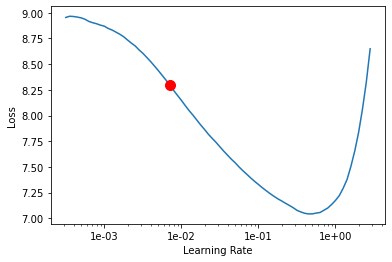

In [ ]:
learn.recorder.plot(skip_end=10, suggestion=True)

In [ ]:
best_lm_lr = learn.recorder.min_grad_lr
learn.fit_one_cycle(1, best_lm_lr)

epoch,train_loss,valid_loss,accuracy,time
0,6.655504,5.636949,0.225670,00:12


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, best_lm_lr)

epoch,train_loss,valid_loss,accuracy,time
0,5.708519,5.214786,0.252337,00:16
1,5.294428,4.916549,0.274554,00:17
2,4.719131,4.898417,0.278571,00:17
3,4.064692,5.001684,0.277560,00:18


In [ ]:
learn.save_encoder('tweet_enc')

In [ ]:
data_clas = TextClasDataBunch.from_df( path="/content/",
                                        train_df=train,
                                        valid_df=valid, 
                                        test_df=test,
                                        vocab=data_lm.train_ds.vocab, 
                                        text_cols='tweet', 
                                        label_cols='label')

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
learn_clas = text_classifier_learner(data_clas, drop_mult=0.4, arch=AWD_LSTM)
learn_clas.load_encoder('tweet_enc')


In [ ]:
learn_clas.lr_find(start_lr=slice(10e-7, 10e-5), end_lr=slice(0.1, 10))

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.16E-04
Min loss divided by 10: 2.00E-02


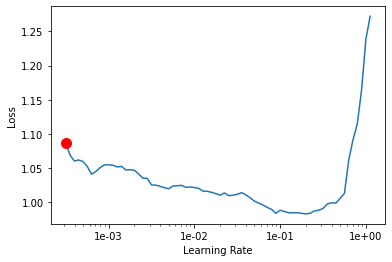

In [ ]:
learn_clas.recorder.plot(skip_end=10, suggestion=True)

In [ ]:
best_clf_lr = learn_clas.recorder.min_grad_lr
best_clf_lr

0.000316227766016838

In [ ]:
learn_clas.fit_one_cycle(5, best_clf_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.963173,0.908400,0.572000,00:06
1,0.908087,0.873298,0.581333,00:07
2,0.877649,0.866977,0.592000,00:07
3,0.864028,0.859431,0.596667,00:06
4,0.846595,0.857689,0.596000,00:07


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
learn_clas.freeze_to(-2)

In [ ]:
learn_clas.fit_one_cycle(7, best_clf_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.832719,0.861305,0.594333,00:08
1,0.848867,0.851379,0.597667,00:08
2,0.838469,0.854341,0.607667,00:08
3,0.827746,0.857396,0.599000,00:08
4,0.796334,0.854314,0.604333,00:08
5,0.786835,0.858058,0.603333,00:08
6,0.758218,0.857894,0.599667,00:08


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [ ]:
learn_clas.unfreeze()
learn_clas.fit_one_cycle(15, best_clf_lr)

In [ ]:
learn_clas.show_results()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


text,target,prediction
xxbos n xxrep 4 e xxrep 4 s xxrep 4 u aag ko khail xxunk ne smajh rkha hai sb ko anjam ka dar ho ye zaruri toh nhi xxunk krta hai jo m https t co xxunk,positive,neutral
xxbos aj k match k bad sb keh ry k me b asa e huwa tha dosto phr ye na ho k india bazi ly jay kio k wala cup b idr e huwa tha,neutral,neutral
xxbos tailor ki maa ki ankh abbu or apny suit ka size dy k aya tha xxunk ne mera bhi mery abbu k size ka s xxrep 4 e diyaa a https t co xxunk,negative,positive
xxbos late but ok hbd to my fave xxunk my bb xxunk i miss you both so much ahhh i hope u guyz are doing well and i hop https t co xxunk,positive,positive
xxbos rt xxunk crying over the fact that i m seeing the boys this month i m ganna be so happy w my friends and i m ganna be in my safe space,neutral,positive


In [ ]:
data_clas.add_test(test["tweet"])
test_preds = learn_clas.get_preds(DatasetType.Test,ordered=True)
predictions = test_preds[0].argmax(1)

# negative    0
# neutral     1
# positive    2

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [ ]:
#original labels
import tensorflow as tf
test["label"] = test["label"].astype('category')
test["label_cat"] = test["label"].cat.codes
ori_label = test["label_cat"];

targets=tf.convert_to_tensor(ori_label)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(orig_val_l, predictions))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       900
           1       0.55      0.59      0.57      1100
           2       0.71      0.69      0.70      1000

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000



In [ ]:
import tensorflow as tf

total = 0
for i in range(0,tf.size(targets)):
  if predictions[i]==targets[i]:
    total += 1
print(total)
print(" Accuracy: "+ str((total/int(tf.size(targets)))*100) +"%")

1906
 Accuracy: 63.53333333333333%


In [ ]:
a = predictions.numpy()
b = pd.DataFrame(a)
b.columns = ["hel"]
print(b.value_counts())

a = targets.numpy()
b = pd.DataFrame(a)
b.columns = ["hel"]
print(b.value_counts())


hel
1      1195
2       965
0       840
dtype: int64
hel
1      1100
2      1000
0       900
dtype: int64


In [ ]:
print("train")
print(train.groupby('label')['id'].nunique())

print("valid")
print(valid.groupby('label')['id'].nunique())

print("test")
print(test.groupby('label')['id'].nunique())


train
label
negative    4102
neutral     5264
positive    4634
Name: id, dtype: int64
valid
label
negative     890
neutral     1128
positive     982
Name: id, dtype: int64
test
label
negative     900
neutral     1100
positive    1000
Name: id, dtype: int64


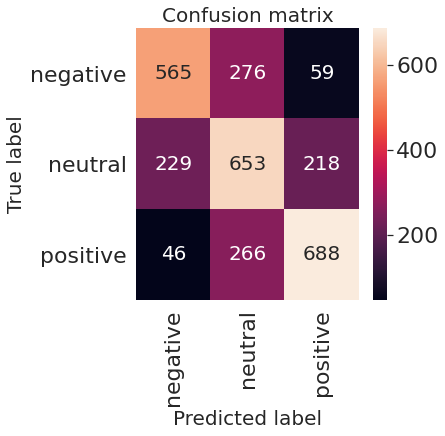

In [ ]:
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
#predictions = model.predict(X_test, batch_size=1000)

LABELS = ['negative', 'neutral','positive']#['graphics','hockey',''] 
#LABELS = cats

confusion_matrix = metrics.confusion_matrix(targets, predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

In [ ]:
learn_clas.save("Final model")